<a href="https://colab.research.google.com/github/financieras/math_for_ai/blob/main/articulos/regresion_lineal_por_minimos_cuadrados_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression from Scratch in Python. Part 2/2**

#### **Evaluation, Metrics & Real-World Use**

Ya sabes implementar regresión lineal por mínimos cuadrados. Pero un modelo que hace predicciones no es útil si no sabes **qué tan buenas son esas predicciones** y **cuándo es apropiado usarlo**.

En este artículo aprenderás a evaluar tu modelo, interpretar sus resultados y decidir cuándo usar este método. Al finalizar, comprenderás las métricas clave, las limitaciones del método y cuándo considerar alternativas.

**Nota**: Este artículo continúa donde lo dejamos en el artículo anterior. Si aún no has implementado regresión lineal por mínimos cuadrados, comienza por ahí para aprovechar al máximo este contenido.

---


# **1. Configuración inicial**

Primero recreamos el modelo que construimos en el artículo anterior con los mismos datos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: tamaño de casa vs precio (los mismos del artículo anterior)
area = np.array([50, 55, 60, 64, 70, 78, 80, 89, 90, 100])
price = np.array([140000, 155000, 190000, 200000, 225000,
                  212000, 240000, 230000, 270000, 300000])

# Matriz de diseño
X = np.column_stack([np.ones(len(area)), area])
y = price

def least_squares(X, y):
    """Calcula los coeficientes óptimos usando mínimos cuadrados"""
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Calcular coeficientes y predicciones
w = least_squares(X, y)
y_pred = X @ w

print(f"Coeficientes calculados:")
print(f"  w₀ (intercept) = ${w[0]:,.2f}")
print(f"  w₁ (slope) = ${w[1]:,.2f}/m²")

Coeficientes calculados:
  w₀ (intercept) = $10,722.85
  w₁ (slope) = $2,791.81/m²


---

# **2. Métricas de Evaluación**

Ahora que tenemos predicciones, necesitamos cuantificar qué tan buenas son. Usaremos tres métricas fundamentales que nos dan perspectivas complementarias sobre el rendimiento del modelo.

## Coeficiente de correlación (r): Midiendo la relación lineal

Antes de evaluar nuestro modelo, necesitamos entender una métrica fundamental: el **coeficiente de correlación lineal de Pearson (r)**, que mide la fuerza y dirección de la relación lineal entre dos variables.

**Valores de r:**
- r = 1: relación lineal positiva perfecta (cuando x sube, y sube proporcionalmente)
- r = -1: relación lineal negativa perfecta (cuando x sube, y baja proporcionalmente)  
- r = 0: no hay relación lineal
- |r| > 0.7: relación lineal fuerte
- |r| < 0.3: relación lineal débil

**Fórmula:**

$$r = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{m} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{m} (y_i - \bar{y})^2}}$$

O de forma equivalente usando covarianza y desviaciones estándar:

$$r = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}$$

> **Interpretación intuitiva**: El numerador mide cómo las desviaciones de x e y de sus medias se mueven juntas. Si ambas variables aumentan o disminuyen juntas, r será cercano a 1 o -1. Si no hay patrón, r estará cerca de 0.

**¿Por qué es importante calcularlo?**  
El coeficiente r nos dice **antes de entrenar el modelo** si existe una relación lineal que valga la pena modelar. Si |r| es muy bajo, sabemos de antemano que regresión lineal no será efectiva.

## R²: La variabilidad explicada

El **R² (Coeficiente de Determinación)** indica qué proporción de la variabilidad de los datos explica nuestro modelo. Varía entre 0 y 1, donde 1 significa ajuste perfecto.

$$R^2 = 1 - \frac{\sum_{i=1}^{m}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{m}(y_i - \bar{y})^2}$$

**Interpretación práctica:**
- **R² = 1**: Modelo perfecto (explica el 100% de la variabilidad)
- **R² = 0.95**: El modelo explica el 95% de la variabilidad en los datos
- **R² = 0**: El modelo no es mejor que simplemente predecir el promedio

## Conexión entre r y R²

Aquí viene un detalle matemático importante: **en regresión lineal simple (una variable), R² = r²**.

Esto significa que el coeficiente de determinación es simplemente el cuadrado del coeficiente de correlación.

**Implicaciones prácticas:**

| Correlación (r) | R² | Interpretación |
|-----------------|----|--------------------|
| r = 0.95 | R² = 0.90 | El modelo explica 90% de la variabilidad |
| r = 0.70 | R² = 0.49 | El modelo explica 49% de la variabilidad |
| r = 0.50 | R² = 0.25 | El modelo explica solo 25% de la variabilidad |
| r = -0.90 | R² = 0.81 | El modelo explica 81% (el signo no afecta R²) |

**Diferencias clave:**
- **r** te indica la dirección (con el signo ±) y la fuerza de la relación
- **R²** siempre es positivo y te indica qué porcentaje de variabilidad explica el modelo
- En regresión múltiple (varias variables), solo existe R², no hay un único r

## RMSE: El error promedio

El **RMSE (Root Mean Square Error)** nos dice el error promedio en las mismas unidades que nuestra variable objetivo (dólares). Es intuitivo: si el RMSE es \\$10,000, significa que en promedio nuestras predicciones tienen un error absoluto de aproximadamente \\$10,000.

$$\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^{m}(y_i - \hat{y}_i)^2}$$

**¿Por qué es útil?**
- A diferencia de R², RMSE está en las **mismas unidades** que tu variable objetivo (dólares, metros, etc.)
- Te da una idea concreta de "cuánto te equivocas" en promedio
- Es fácil de comunicar: "el modelo se equivoca en promedio $15,000"

## Calculando las métricas

In [2]:
# Calculamos las métricas de evaluación

# Coeficiente de correlación r (para regresión simple)
r = np.corrcoef(area, price)[0, 1]

# MSE y RMSE
mse = np.mean((y - y_pred) ** 2)
rmse = np.sqrt(mse)

# Coeficiente de determinación R²
ss_res = np.sum((y - y_pred) ** 2)  # Suma de cuadrados de residuos
ss_tot = np.sum((y - y.mean()) ** 2)  # Suma total de cuadrados
r2 = 1 - (ss_res / ss_tot)

# Mostramos los resultados
print("\n" + "="*50)
print("MÉTRICAS DE RENDIMIENTO")
print("="*50)
print(f"r (correlación): {r:.4f}")
print(f"  → Relación lineal {'fuerte' if abs(r) > 0.7 else 'moderada' if abs(r) > 0.4 else 'débil'}")
print(f"\nR² (coef. determinación): {r2:.4f}")
print(f"  → El modelo explica {r2*100:.2f}% de la variabilidad")
print(f"\nVerificación: r² = {r**2:.4f} ≈ R² = {r2:.4f} ✓")
print(f"\nRMSE (error cuadrático medio): ${rmse:,.2f}")
print(f"  → Error promedio de aproximadamente ${rmse:,.0f}")


MÉTRICAS DE RENDIMIENTO
r (correlación): 0.9488
  → Relación lineal fuerte

R² (coef. determinación): 0.9001
  → El modelo explica 90.01% de la variabilidad

Verificación: r² = 0.9001 ≈ R² = 0.9001 ✓

RMSE (error cuadrático medio): $14,573.71
  → Error promedio de aproximadamente $14,574


## Visualizando el ajuste

Las métricas nos dan números, pero visualizar el ajuste nos ayuda a entender mejor el rendimiento del modelo:

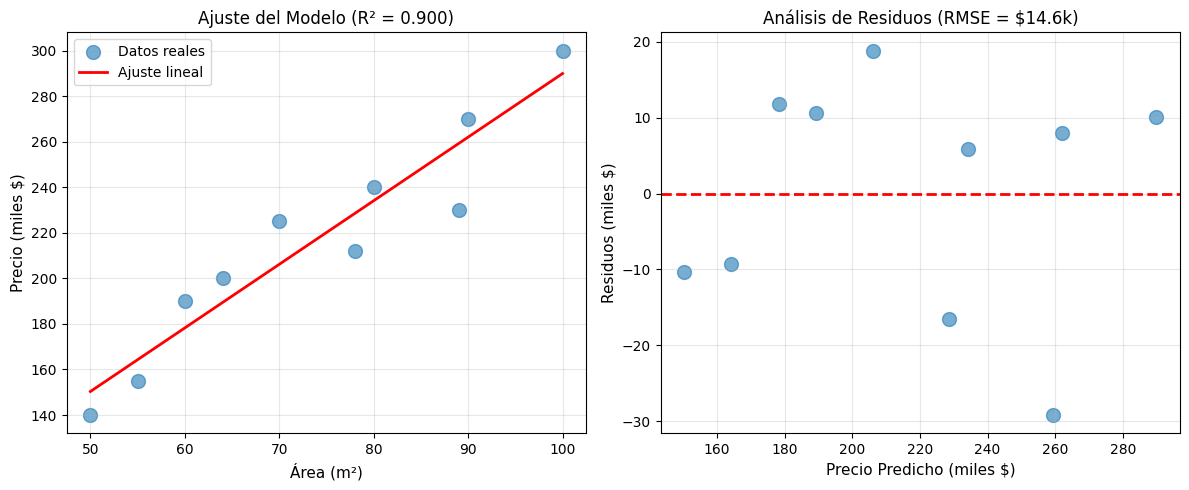


El análisis de residuos muestra qué tan lejos está cada predicción del valor real.
Idealmente, los residuos deberían distribuirse aleatoriamente alrededor de cero.


In [3]:
# Visualización del modelo
plt.figure(figsize=(12, 5))

# Subplot 1: Ajuste del modelo
plt.subplot(1, 2, 1)
plt.scatter(area, price/1000, alpha=0.6, s=100, label='Datos reales')
plt.plot(area, y_pred/1000, 'r-', linewidth=2, label='Ajuste lineal')
plt.xlabel('Área (m²)', fontsize=11)
plt.ylabel('Precio (miles $)', fontsize=11)
plt.title(f'Ajuste del Modelo (R² = {r2:.3f})', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Subplot 2: Análisis de residuos
plt.subplot(1, 2, 2)
residuals = y - y_pred
plt.scatter(y_pred/1000, residuals/1000, alpha=0.6, s=100)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Precio Predicho (miles $)', fontsize=11)
plt.ylabel('Residuos (miles $)', fontsize=11)
plt.title(f'Análisis de Residuos (RMSE = ${rmse/1000:.1f}k)', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nEl análisis de residuos muestra qué tan lejos está cada predicción del valor real.")
print("Idealmente, los residuos deberían distribuirse aleatoriamente alrededor de cero.")

---

# **3. Haciendo Predicciones**

Con nuestro modelo evaluado, podemos usarlo para predecir precios de nuevas viviendas:

In [4]:
# Predicciones para nuevas viviendas
new_areas = np.array([65, 85, 95])
predictions = w[0] + w[1] * new_areas

print("\nPREDICTIONS FOR NEW PROPERTIES")
print("-" * 40)
for area_val, pred in zip(new_areas, predictions):
    print(f"   {area_val}m² house  →  ${pred:,.0f}")

print(f"\n(Remember: predictions have ~${rmse:,.0f} average error)")


PREDICTIONS FOR NEW PROPERTIES
----------------------------------------
   65m² house  →  $192,190
   85m² house  →  $248,027
   95m² house  →  $275,945

(Remember: predictions have ~$14,574 average error)


---

# **4. Comparación con scikit-learn**

Una forma excelente de validar nuestra implementación es compararla con la biblioteca estándar de la industria:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creamos y entrenamos el modelo de scikit-learn
sklearn_model = LinearRegression()
sklearn_model.fit(area.reshape(-1, 1), price)

# Predicciones con scikit-learn
sklearn_pred = sklearn_model.predict(area.reshape(-1, 1))
sklearn_rmse = np.sqrt(mean_squared_error(price, sklearn_pred))
sklearn_r2 = r2_score(price, sklearn_pred)

# Comparamos resultados
print("\n" + "="*65)
print("COMPARISON: Our Implementation vs scikit-learn")
print("="*65)
print(f"\n{'Parameter':<20} {'Our impl.':<22} {'scikit-learn':<22}")
print("-" * 65)
print(f"{'w₀ (intercept)':<20} ${w[0]:>18,.2f}   ${sklearn_model.intercept_:>18,.2f}")
print(f"{'w₁ (slope)':<20} ${w[1]:>17,.2f}/m²  ${sklearn_model.coef_[0]:>17,.2f}/m²")
print(f"\n{'R²':<20} {r2:>21.4f}   {sklearn_r2:>21.4f}")
print(f"{'RMSE':<20} ${rmse:>20,.2f}   ${sklearn_rmse:>20,.2f}")
print("\n✓ Results are identical! Our implementation is correct.")


COMPARISON: Our Implementation vs scikit-learn

Parameter            Our impl.              scikit-learn          
-----------------------------------------------------------------
w₀ (intercept)       $         10,722.85   $         10,722.85
w₁ (slope)           $         2,791.81/m²  $         2,791.81/m²

R²                                  0.9001                  0.9001
RMSE                 $           14,573.71   $           14,573.71

✓ Results are identical! Our implementation is correct.


---

# **5. Ventajas, Limitaciones y Cuándo Usarlo**

Ahora que entendemos cómo funciona y cómo evaluarlo, es crucial saber cuándo es apropiado usar este método.

## Ventajas del método de mínimos cuadrados

El método de mínimos cuadrados ordinarios (OLS) tiene características que lo hacen especialmente valioso:

- **Solución exacta**: Encuentra los coeficientes óptimos directamente, sin iteraciones ni aproximaciones
- **Rapidez**: Para datasets pequeños y medianos, es computacionalmente muy eficiente
- **Interpretabilidad**: Los coeficientes tienen una interpretación directa y clara que puedes explicar a stakeholders
- **Garantía matemática**: Si existe solución, este método la encuentra
- **Sin hiperparámetros**: No requiere ajuste de learning rate ni otros parámetros

## Limitaciones importantes

Sin embargo, el método tiene limitaciones que debes conocer:

In [6]:
# Ejemplo de problema con multicolinealidad
X_problem = np.column_stack([area, area * 2])  # Columnas linealmente dependientes

print("Example with linearly dependent columns:")
print("\nFirst 3 rows of problematic matrix:")
print(X_problem[:3])
print(f"\nDeterminant of X.T @ X: {np.linalg.det(X_problem.T @ X_problem):.2e}")
print("\nA determinant near zero indicates matrix inversion problems!")
print("This happens when features are perfectly correlated.")

Example with linearly dependent columns:

First 3 rows of problematic matrix:
[[ 50 100]
 [ 55 110]
 [ 60 120]]

Determinant of X.T @ X: 0.00e+00

A determinant near zero indicates matrix inversion problems!
This happens when features are perfectly correlated.


**Problemas principales del método:**

1. **Matrices singulares**: Cuando las variables son linealmente dependientes, la matriz ($X^T X$) no es invertible
2. **Multicolinealidad**: Variables predictoras muy correlacionadas causan coeficientes inestables
3. **Escalabilidad limitada**: Para datasets muy grandes (millones de registros), la inversión de matriz tiene complejidad O(n³) y se vuelve prohibitivamente costosa
4. **Sensibilidad a outliers**: Los errores al cuadrado amplifican el efecto de valores atípicos, pudiendo sesgar el modelo
5. **Consumo de memoria**: Requiere cargar todo el dataset en memoria RAM

## ¿Cuándo usar mínimos cuadrados vs Gradient Descent?

La elección entre estos métodos depende principalmente del tamaño de tus datos:

**Usa mínimos cuadrados cuando:**
- Tienes  pocas características, normalmente menos de unos cientos de columnas en hardware de consumo
- Necesitas la solución exacta en una sola operación
- El dataset cabe cómodamente en memoria RAM
- Requieres interpretabilidad directa de los coeficientes
- No hay problemas de multicolinealidad

**Usa Gradient Descent cuando:**
- Tienes millones de registros o cientos/miles de características
- El dataset no cabe en memoria (puedes usar mini-batches)
- Necesitas actualizar el modelo con nuevos datos continuamente (online learning)
- Trabajas con redes neuronales u otros modelos no lineales
- Quieres regularización más flexible (L1, L2)

**El motivo para elegir**: Superando varios cientos de características, el costo y la dificultad para invertir matrices aumentan de manera no lineal, haciendo que los métodos iterativos como el descenso del gradiente sean una mejor opción para datasets extensos o de alta dimensión.

**Regla práctica de escalabilidad:**
   - < 10,000 observaciones y < 100 features → Mínimos cuadrados (rápido)
   - \> 100,000 observaciones o > 1,000 features → Gradient Descent (escalable)
   - Entre 10k-100k → Ambos funcionan, elige según necesidades

---

# **6. Conclusión**

En este artículo completamos nuestro recorrido por la regresión lineal con mínimos cuadrados, aprendiendo no solo a construir el modelo, sino también a evaluarlo correctamente y entender cuándo usarlo.

## Recapitulación

**Lo que aprendimos:**
- Cómo medir el rendimiento con **RMSE** y **R²**
- La relación entre R² y la correlación
- Cómo visualizar y validar el ajuste del modelo
- Las ventajas y limitaciones del método
- Cuándo elegir mínimos cuadrados vs Gradient Descent

**Por qué importa:**
La regresión lineal por mínimos cuadrados es:
- **Tu punto de partida** para cualquier problema de predicción numérica
- **Extremadamente efectiva** cuando hay relaciones lineales en los datos
- **Interpretable y explicable**, crucial en contextos empresariales
- **La base** para entender métodos más avanzados

## Próximos pasos

Ahora que dominas la solución de forma cerrada, el siguiente paso natural es explorar el **algoritmo de Gradient Descent**. Este método te permitirá:
- Escalar a problemas con millones de datos
- Entender la optimización iterativa
- Prepararte para Deep Learning

En el próximo artículo de esta serie, implementaremos Gradient Descent desde cero y compararemos su rendimiento con mínimos cuadrados, dándote todas las herramientas para decidir qué método usar en cada situación.

---

#### Blog Tags

```txt
#Python
#DataScience
#MachineLearning
#LinearRegression
#ModelEvaluation
#RMSE
#R2Score
#Statistics
#scikit-learn
#Tutorial
#Metrics
```